In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from config import cache_path, save_path
from pathlib import Path
import numpy as np
import pandas as pd

In [15]:
boc = BrainObservatoryCache(manifest_file=str(
            Path(cache_path) / 'brain_observatory_manifest.json'))

eid=501559087
#eid=564425777
eid=567734055

data_dct={}

data_set = boc.get_ophys_experiment_data(eid)
#exps = boc.get_ophys_experiments(experiment_container_ids=[eid])

data_dct['movie_stim_table'] = data_set.get_stimulus_table(
                'natural_movie_one')

data_dct['neural_responses'] = data_set.get_dff_traces()[1]

In [27]:
visp_ecs = boc.get_experiment_containers(ids=[564425775])
exps = boc.get_ophys_experiments(experiment_container_ids=[visp_ecs])
print(exps)

[]


In [25]:
visp_ecs

[{'id': 564425775,
  'imaging_depth': 175,
  'targeted_structure': 'VISl',
  'cre_line': 'Emx1-IRES-Cre',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'donor_name': '283147',
  'specimen_name': 'Emx1-IRES-Cre;Camk2a-tTA;Ai93-283147',
  'tags': [],
  'failed': False}]

In [18]:
data_set

In [4]:
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)

In [14]:
cells.columns

Index(['all_stim', 'area', 'cell_specimen_id', 'donor_full_genotype', 'dsi_dg',
       'experiment_container_id', 'failed_experiment_container', 'g_dsi_dg',
       'g_osi_dg', 'g_osi_sg', 'image_sel_ns', 'imaging_depth', 'osi_dg',
       'osi_sg', 'p_dg', 'p_ns', 'p_run_mod_dg', 'p_run_mod_ns',
       'p_run_mod_sg', 'p_sg', 'peak_dff_dg', 'peak_dff_ns', 'peak_dff_sg',
       'pref_dir_dg', 'pref_image_ns', 'pref_ori_sg', 'pref_phase_sg',
       'pref_sf_sg', 'pref_tf_dg', 'reliability_dg', 'reliability_nm1_a',
       'reliability_nm1_b', 'reliability_nm1_c', 'reliability_nm2',
       'reliability_nm3', 'reliability_ns', 'reliability_sg',
       'rf_area_off_lsn', 'rf_area_on_lsn', 'rf_center_off_x_lsn',
       'rf_center_off_y_lsn', 'rf_center_on_x_lsn', 'rf_center_on_y_lsn',
       'rf_chi2_lsn', 'rf_distance_lsn', 'rf_overlap_index_lsn', 'run_mod_dg',
       'run_mod_ns', 'run_mod_sg', 'sfdi_sg', 'specimen_id', 'tfdi_dg',
       'time_to_peak_ns', 'time_to_peak_sg', 'tld1_id', 'tld1

In [22]:
cells.head()
my_cells = cells[cells['experiment_container_id'].isin([564425775])]
my_cells.head()

,all_stim,area,cell_specimen_id,donor_full_genotype,dsi_dg,experiment_container_id,failed_experiment_container,g_dsi_dg,g_osi_dg,g_osi_sg,...,specimen_id,tfdi_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
21044,False,VISl,570926543,Emx1-IRES-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP...,NaN,564425775,False,NaN,NaN,0.801374,...,556936638,NaN,0.16585,0.13268,177836119,Emx1-IRES-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
21047,False,VISl,570926568,Emx1-IRES-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP...,NaN,564425775,False,NaN,NaN,NaN,...,556936638,NaN,NaN,NaN,177836119,Emx1-IRES-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
21048,False,VISl,570926576,Emx1-IRES-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP...,0.692582,564425775,False,0.364605,0.609189,NaN,...,556936638,0.404318,NaN,NaN,177836119,Emx1-IRES-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
21049,False,VISl,570926586,Emx1-IRES-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP...,NaN,564425775,False,NaN,NaN,NaN,...,556936638,NaN,NaN,NaN,177836119,Emx1-IRES-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
21051,False,VISl,570926598,Emx1-IRES-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP...,0.290527,564425775,False,0.166913,0.273796,NaN,...,556936638,0.370169,NaN,NaN,177836119,Emx1-IRES-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


In [21]:
len(my_cells)

347

In [179]:
data_dct['neural_responses'].shape

(241, 114165)

In [180]:
data_dct['movie_stim_table']

,frame,start,end,repeat
0,0,70476,70476,0
1,1,70477,70477,0
2,2,70478,70478,0
3,3,70479,70479,0
4,4,70480,70480,0
...,...,...,...,...
8995,895,79521,79521,9
8996,896,79522,79522,9
8997,897,79523,79523,9
8998,898,79524,79524,9


In [141]:
data_dct['neural_responses'][:,38749:(38749+900)]
#X=dff[1][:,38749:(38749+900)]

array([[ 4.1375391e-02,  1.8582508e-02,  7.5950958e-02, ...,
         3.9312635e-02, -3.0153748e-02,  4.7325236e-03],
       [ 1.4622192e-01,  6.7504428e-02, -1.4544210e-02, ...,
         1.8862096e+00,  1.6689435e+00,  1.7145643e+00],
       [-2.6581520e-02, -9.7623924e-05, -6.5292567e-02, ...,
        -5.2210122e-02, -5.1503856e-02,  8.1780646e-03],
       ...,
       [-3.0112842e-02, -5.1095508e-02, -1.9610340e-02, ...,
        -3.0313572e-02,  5.7511050e-02, -8.6430162e-02],
       [-1.3270264e-02,  1.1683735e-02, -7.0314378e-02, ...,
         5.6903075e-02, -8.9695221e-03, -2.8303338e-02],
       [ 4.4263583e-02,  3.8264357e-02, -2.8717842e-02, ...,
        -4.9459547e-02, -3.5502523e-02, -2.5548382e-02]], dtype=float32)

In [67]:
# Download experiment containers for Cux2 experiments
#Pan-excitatory
import pprint
Emx1_exps = boc.get_experiment_containers(cre_lines=['Emx1-IRES-Cre'])
print("Emx1 experiments: %d\n" % len(Emx1_exps))

print("Example experiment container record:")
pprint.pprint(Emx1_exps[0])

# Find all of the experiments for an experiment container
Emx1_id = Emx1_exps[0]['id']
exps = boc.get_ophys_experiments(experiment_container_ids=[Emx1_id])
print("Experiments for experiment_container_id %d: %d\n" % (Emx1_id, len(exps)))
pprint.pprint(exps)
exp=exps[1]
print(exp)

Emx1 experiments: 41

Example experiment container record:
{'cre_line': 'Emx1-IRES-Cre',
 'donor_name': '283147',
 'failed': False,
 'id': 564425775,
 'imaging_depth': 175,
 'reporter_line': 'Ai93(TITL-GCaMP6f)',
 'specimen_name': 'Emx1-IRES-Cre;Camk2a-tTA;Ai93-283147',
 'tags': [],
 'targeted_structure': 'VISl'}
Experiments for experiment_container_id 564425775: 3

[{'acquisition_age_days': 121,
  'cre_line': 'Emx1-IRES-Cre',
  'donor_name': '283147',
  'experiment_container_id': 564425775,
  'fail_eye_tracking': True,
  'id': 567734055,
  'imaging_depth': 175,
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'session_type': 'three_session_B',
  'specimen_name': 'Emx1-IRES-Cre;Camk2a-tTA;Ai93-283147',
  'targeted_structure': 'VISl'},
 {'acquisition_age_days': 106,
  'cre_line': 'Emx1-IRES-Cre',
  'donor_name': '283147',
  'experiment_container_id': 564425775,
  'fail_eye_tracking': True,
  'id': 564425777,
  'imaging_depth': 175,
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'session_type': 't

In [260]:
embeddings=np.load(Path(save_path)/Path('natural_movie_one_dino.npy'))
#embeddings=np.load(Path(save_path)/Path('movie_one.npy'))
print(embeddings.shape)
embeddings=np.load('/home/maria/CalciumImaging/movie_one_dino.npy')
#embeddings=np.load(Path(save_path)/Path('natural_movie_one_clip.npy'))

(900, 768)


In [261]:
def make_regression_data(data_dct, embeddings):
        np.random.seed = 7879
        stimuli = data_dct['movie_stim_table'].loc[data_dct['movie_stim_table']['repeat'] == 9]
        print(stimuli)

        X_train, X_test, y_train_inds, y_test_inds = train_test_split(embeddings,stimuli['start'].values, test_size=0.7, random_state=42)
        y_train=data_dct['neural_responses'][:,y_train_inds]
        y_test=data_dct['neural_responses'][:,y_test_inds]

        return y_train, y_test, X_train, X_test

y_train_movie, y_test_movie, train_embedding,test_embedding = make_regression_data(data_dct, embeddings) 
print(y_train_movie.shape, y_test_movie.shape, train_embedding.shape, test_embedding.shape)

      frame  start    end  repeat
8100      0  78621  78621       9
8101      1  78622  78622       9
8102      2  78623  78623       9
8103      3  78624  78624       9
8104      4  78625  78625       9
...     ...    ...    ...     ...
8995    895  79521  79521       9
8996    896  79522  79522       9
8997    897  79523  79523       9
8998    898  79524  79524       9
8999    899  79525  79525       9

[900 rows x 4 columns]
(241, 270) (241, 630) (270, 768) (630, 768)


In [117]:
y_train_movie.shape

(720, 274)

In [262]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Assuming train_embedding and test_embedding are your feature matrices
# and y_train_movie, y_test_movie are your target variables

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training features
train_embedding_scaled = scaler.fit_transform(train_embedding)

# Transform the test features using the same scaler
test_embedding_scaled = scaler.transform(test_embedding)


# Create a Linear Regression model
regr = LinearRegression()
regr=Ridge(10)

# Fit the model with scaled training features and target variable
regr.fit(train_embedding_scaled, y_train_movie.T)

# Make predictions on scaled test features
predictions = regr.predict(test_embedding_scaled)

# Calculate R-squared score
r2 = r2_score(y_test_movie.T, predictions)

print("R-squared score:", r2)

R-squared score: -0.28098991489592484


In [263]:
scores=[]
for i in range(0,y_test_movie.shape[0]):
    scores.append(r2_score(y_test_movie.T[:,i], predictions[:,i]))
    print(r2_score(y_test_movie.T[:,i], predictions[:,i]))

0.31222885590889016
-0.5934490419674454
-0.926801359201102
0.8595153307277663
-0.7167214519731107
-0.6559684985495673
0.8494383562099622
-0.7179642754896391
0.6520011984378664
-0.9281054268378328
-0.5437595892517477
-0.4519737260785819
-0.18985685859141554
-0.14709835516623637
-0.8964232069541131
-0.7220482418058753
0.7581053841625314
-0.4666491660534158
-0.8675404372969053
-0.4467271049998143
-0.45203523556747394
-0.37816768693835834
-0.6642963153474841
-0.5698122841493851
-0.49241658829975976
-0.12657996631918422
-0.6574136676386331
0.003950074443967555
0.6861379213421626
-0.6599256182735058
-0.5029272634353179
0.06813729791008649
-0.18508548207069597
-0.6504899215191213
-0.48527179057122205
-1.0940819178583903
0.7531816662340418
-0.4681383836498676
0.1658719067975406
-0.6611956299520756
0.26736185906028465
-0.43484587085483284
0.5300048206758294
-0.12585083780115291
-0.5038167499278676
-0.732203644609956
-0.7864046483010205
0.07517810943645686
-0.46805508856021216
-0.025695385974352

(array([ 7., 37., 71., 46., 13., 16., 14., 10., 12., 15.]),
 array([-1.09408192, -0.8901569 , -0.68623188, -0.48230686, -0.27838185,
        -0.07445683,  0.12946819,  0.33339321,  0.53731822,  0.74124324,
         0.94516826]),
 <BarContainer object of 10 artists>)

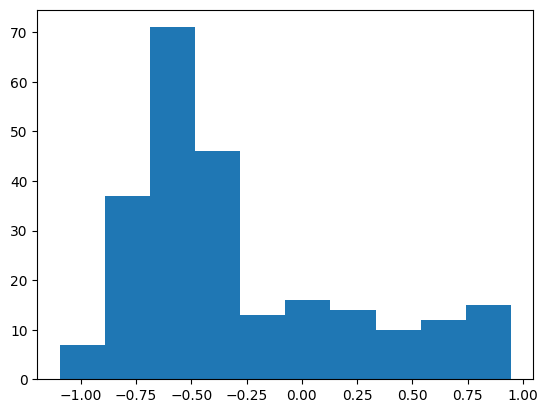

In [264]:
import matplotlib.pyplot as plt


plt.hist(scores)

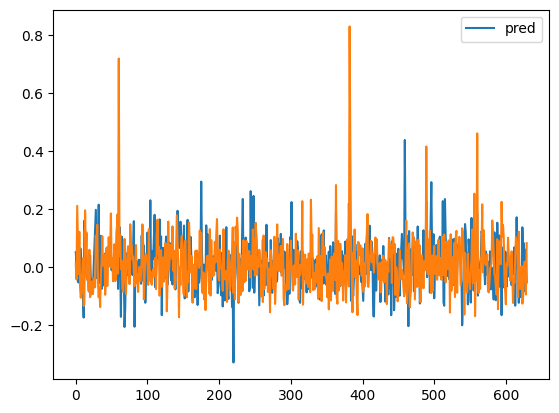

In [265]:
plt.plot(predictions[:,5],label='pred')
plt.plot(y_test_movie.T[:,5])
plt.legend()

In [137]:
predictions.shape

(180, 274)

In [64]:
regr.coef_.shape

(174, 768)

In [266]:
from sklearn.decomposition import PCA

pca=PCA(n_components=30)
trn=pca.fit_transform(train_embedding_scaled)
print(train_embedding.shape, test_embedding.shape)
tst=pca.transform(test_embedding_scaled)
coef=pca.transform(regr.coef_)
#print(tst.shape)
print(tst.shape)

(270, 768) (630, 768)
(630, 30)


[[ 16.40316609  -0.80008674  -3.41259175 ...   5.19355231   0.48763519
   -1.12073077]
 [ -8.03468784 -11.69722329  -0.65031721 ...   0.3868947    0.39187164
   -0.09809436]
 [ 26.11321647   3.90248969 -16.88003075 ...   5.52200543   0.20718132
    0.0661614 ]
 ...
 [-13.3956442   -2.54168196  -2.92737916 ...  -1.1142411   -0.98972841
   -1.42062566]
 [-16.71852405  -1.4194999   -2.17341686 ...   0.77029014   0.55363156
    0.08137929]
 [ 13.18914799   8.02078581  -8.05807504 ...  -1.50143203  -1.47310946
    0.1624635 ]]


In [267]:
scaler = StandardScaler()

# Fit and transform the training features
trn_sc = scaler.fit_transform(trn)

# Transform the test features using the same scaler
tst_sc = scaler.transform(tst)

In [272]:
print(coef.shape)

(241, 30)


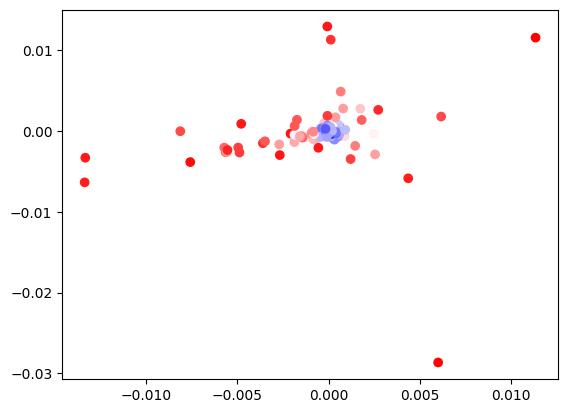

In [268]:
plt.scatter(coef[:,0],coef[:,1],c=scores, cmap='bwr')

/tmp/ipykernel_204200/3405913166.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tst_sc[:,0],tst_sc[:,1], cmap='magma')


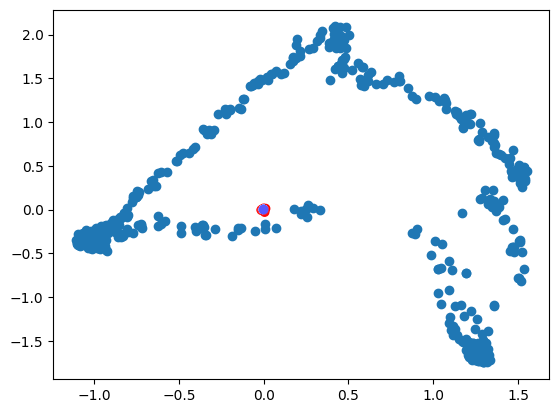

In [269]:
plt.scatter(coef[:,0],coef[:,1],c=scores, cmap='bwr')
plt.scatter(tst_sc[:,0],tst_sc[:,1], cmap='magma')

In [232]:
pca.components_.shape

(30, 768)

In [230]:
regr.coef_.shape

(241, 768)

<Axes: >

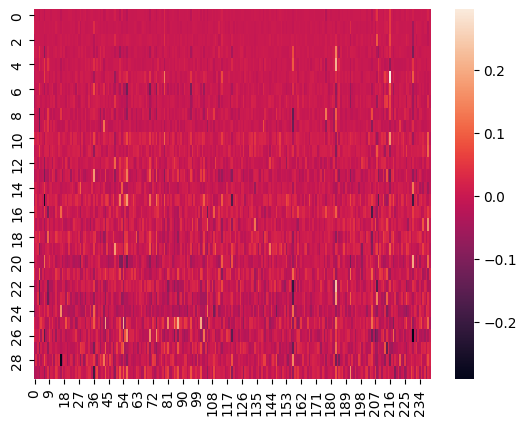

In [270]:
heatmap=pca.components_@regr.coef_.T
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

pw=cosine_similarity(pca.components_,regr.coef_)


sns.heatmap(pw)

<Axes: >

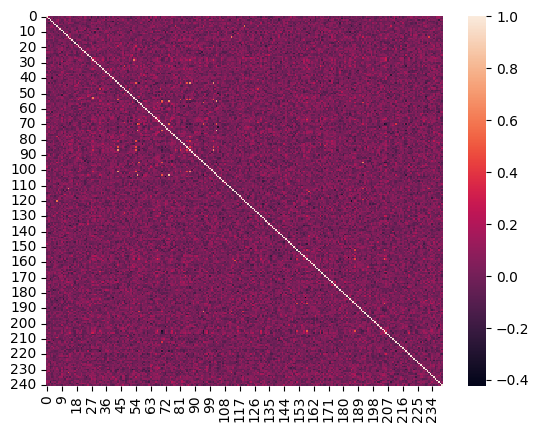

In [271]:
heatmap=pca.components_@regr.coef_.T
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

pw=cosine_similarity(regr.coef_)


sns.heatmap(pw)

In [224]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Assuming train_embedding and test_embedding are your feature matrices
# and y_train_movie, y_test_movie are your target variables

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training features
train_embedding_scaled = trn

# Transform the test features using the same scaler
test_embedding_scaled = tst


# Create a Linear Regression model
regr = LinearRegression()
regr=Ridge(10)

# Fit the model with scaled training features and target variable
regr.fit(train_embedding_scaled, y_train_movie.T)

# Make predictions on scaled test features
predictions = regr.predict(test_embedding_scaled)

# Calculate R-squared score
r2 = r2_score(y_test_movie.T, predictions)

print("R-squared score:", r2)

R-squared score: 0.026846440024469648


0.12568502261625647
-0.04518997757761367
-0.05660218666715555
0.649133162458905
-0.17742298230169062
-0.060741594053036696
0.5362372419204947
-0.09689795623815378
0.3924988053738897
-0.140655819020572
-0.05057252260537326
0.02322160349145408
-0.005792001185173312
0.19330339534054108
-0.10316049035332031
-0.01931986280909781
0.29782550139912456
-0.062115239033648795
-0.0557929305515823
-0.02934238649063503
-0.08425877208529609
-0.0784869080944941
-0.059646590506228
-0.07350729432522107
-0.07336322697034059
0.1386941721894075
-0.08847315609980133
0.1922401333410647
0.4197964946882604
-0.1210493318894863
-0.017660242661674985
0.12085339535850914
0.017471187625271223
-0.1385099239942429
-0.08402420559090173
-0.14249126304639992
0.4832776802733162
-0.0666520091091447
0.07949335457775442
-0.05344360324556874
-0.09772291135136735
-0.07396043491208815
0.3525922531148026
-0.38730734023188895
-0.08125068884856157
-0.12813181356632652
-0.1851404466296962
0.1390374087669488
0.00802312107516201
0.1

(array([ 3.,  6., 68., 50., 18., 12.,  6.,  6.,  2.,  3.]),
 array([-0.38730734, -0.27829131, -0.16927528, -0.06025925,  0.04875679,
         0.15777282,  0.26678885,  0.37580488,  0.48482091,  0.59383694,
         0.70285297]),
 <BarContainer object of 10 artists>)

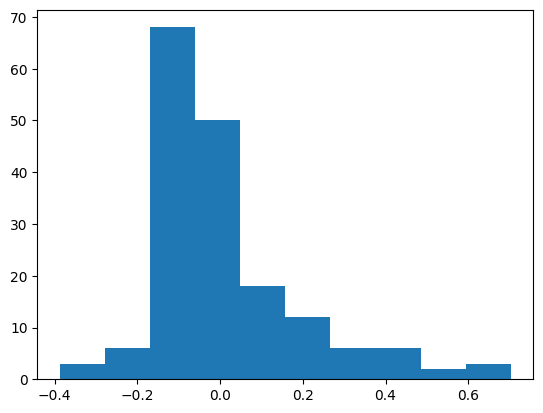

In [225]:
scores=[]
for i in range(0,174):
    scores.append(r2_score(y_test_movie.T[:,i], predictions[:,i]))
    print(r2_score(y_test_movie.T[:,i], predictions[:,i]))

import matplotlib.pyplot as plt


plt.hist(scores)